<div class="alert alert-block alert-success">

# **1.** **Setup**

<div>

In [6]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 58.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [1]:
from utils import *
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV


In [2]:
# Set random seeds for reproducibility
tf.random.set_seed(221)
random.seed(221)
np.random.seed(221)
tf.random.set_seed(221)

## **1.1** Datasets

In [3]:
# Load the train/val split data
with open('train_val_split.pkl', 'rb') as f:
    data = pickle.load(f)

# Store the data in variables
x_train = data['x_train']
x_val = data['x_val']
y_train = data['y_train']
y_val = data['y_val']

In [4]:
# For EXTRA

# Load the train/val split data without preprocessing
with open('train_val_split_no_preproc.pkl', 'rb') as f:
    data_no_preproc = pickle.load(f)

# Convert DataFrames to list
train_texts = data_no_preproc['x_train'].tolist()
val_texts = data_no_preproc['x_val'].tolist()

# Convert Series to list
train_labels = data_no_preproc['y_train'].tolist()
val_labels = data_no_preproc['y_val'].tolist()

## **1.2** Parameters

In [5]:
# ------- Parameters -------
# Glove
emb_size = 200 # start small than increase to find the best value

# TF-IDF
max_df = 0.8 # we are removing terms that appear in >80% of tweets

# Word2Vec
window = 2         # context window size
min_count = 1      # minimum word frequency to include

## **1.3** General

In [6]:
corpus = x_train['text']

#get list with lenghts of sentences
train_len = []
for i in corpus:
    train_len.append(len(i))

vector_size = max(train_len)

metrics_df = []

In [7]:
import nltk
nltk.download('punkt', download_dir='/Users/mgalao/nltk_data')
nltk.data.path.append('/Users/mgalao/nltk_data')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/mgalao/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [8]:
tokenized_train = [word_tokenize(tweet.lower()) for tweet in x_train['text']]
max_seq_len = max(len(tokens) for tokens in tokenized_train)

## **1.4** Models

### Glove

In [ ]:
model_name = 'glove-twitter'
glove_model = gensim.downloader.load(f'{model_name}-{emb_size}')

### Text Embeddings 3 Small

In [ ]:
# EXTRA

# Load variables from .env into environment
load_dotenv()

# Print environment variable
print("AZURE_OPENAI_ENDPOINT:", os.getenv("AZURE_OPENAI_ENDPOINT"))

# Initialize Azure OpenAI client
client = AzureOpenAI(
    api_key=os.getenv("AZURE_OPENAI_KEY"),
    api_version="2024-02-01",
    azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT")
)

# Define embedding model
model = "text-embedding-3-small"

In [ ]:
# Define embedding model text embedding
model_te3s = "text-embedding-3-small"

### Roberta

In [ ]:
# Load the pre-trained model and tokenizer for roberta
model_name = "cardiffnlp/twitter-roberta-base"
tokenizer_roberta = AutoTokenizer.from_pretrained(model_name)
model_roberta = AutoModel.from_pretrained(model_name)

### LSTM

In [ ]:
input_ = Input(shape=(max_seq_len, vector_size))

x = Masking(mask_value=0.0)(input_)
x = Bidirectional(LSTM(units=units, return_sequences=False, dropout=dropout, recurrent_dropout=dropout))(x)
x = Dropout(dropout)(x)
output = Dense(num_class, activation='softmax')(x)

<div class="alert alert-block alert-success">

# **2.** **Hyperparameter Tuning**

<div>

## **2.1** LR with Text Embedding 3

### **2.1.1** Running Model

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
X_train_te3s, X_val_te3s, y_train_pred_te3s, y_val_pred_te3s = embedding_te3s(
    train_texts=train_texts,
    train_labels=train_labels,
    val_texts=val_texts,
    cache_file_train="X_train_te3s_embeddings.pkl",
    cache_file_val="X_val_te3s_embeddings.pkl",
    client=client,
    model_te3s=model_te3s,
    batch_size=32,
    model=model
)


In [ ]:
X_combined = np.vstack([X_train_te3s, X_val_te3s])
y_combined = np.concatenate([train_labels, val_labels])

split_index = [-1]*len(X_train_te3s) + [0]*len(X_val_te3s)
ps = PredefinedSplit(test_fold=split_index)

In [ ]:
param_grid = [
    {'penalty': ['l1'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10],
     'class_weight': [None, 'balanced'], 'multi_class': ['ovr', 'multinomial']},

    {'penalty': ['l2'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10],
     'class_weight': [None, 'balanced'], 'multi_class': ['ovr', 'multinomial']},

    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.01, 0.1, 1, 10],
     'l1_ratio': [0.0, 0.5, 1.0], 'class_weight': [None, 'balanced'], 'multi_class': ['ovr', 'multinomial']}
]

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',  # ou outro scoring adequado
    cv=ps,
    verbose=2,
    n_jobs=-1,
    error_score='raise'
)

grid.fit(X_combined, y_combined)

In [ ]:
grid.best_params_
grid.best_score_
grid.best_estimator_

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_score_)

### **2.1.2** Assess

In [ ]:
model_lr = LogisticRegression( penalty='elasticnet',
    solver='saga',
    l1_ratio=0.4,
    C=10,
    class_weight=None,
    max_iter=1000,
    multi_class='ovr')

In [ ]:
title = "Logistic Regression with Text Embedding 3 Small"

In [ ]:
X_train_te3s,X_val_te3s,y_train_pred_te3s,y_val_pred_te3s = embedding_te3s(train_texts=train_texts,
                                                                 train_labels=train_labels,
                                                                 val_texts = val_texts,
                                                                 cache_file_train="X_train_te3s_embeddings.pkl",
                                                                 cache_file_val="X_val_te3s_embeddings.pkl",
                                                                 client=client,
                                                                 model_te3s=model_te3s,
                                                                 batch_size=32,
                                                                 model=model_lr)

In [ ]:
get_metrics_df(title, train_labels, y_train_pred_te3s, val_labels, y_val_pred_te3s)
plot_metrics(train_labels, y_train_pred_te3s, val_labels, y_val_pred_te3s, title=title)

## **2.2** XGB with Text Embedding 3

### **2.2.1** Run Model

In [ ]:
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
param_grid_xgb = {
    'learning_rate': [0.2, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 500],
    'subsample': [0.7,1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1],
}

In [ ]:
X_train_te3s, X_val_te3s, y_train_pred_te3s, y_val_pred_te3s = embedding_te3s(
    train_texts=train_texts,
    train_labels=train_labels,
    val_texts=val_texts,
    cache_file_train="X_train_te3s_embeddings.pkl",
    cache_file_val="X_val_te3s_embeddings.pkl",
    client=client,
    model_te3s=model_te3s,
    batch_size=32,
    model=xgb
)


In [ ]:
X_combined = np.vstack([X_train_te3s, X_val_te3s])
y_combined = np.concatenate([train_labels, val_labels])

split_index = [-1]*len(X_train_te3s) + [0]*len(X_val_te3s)
ps = PredefinedSplit(test_fold=split_index)

In [ ]:
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='f1_macro',
    cv=ps,
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

In [ ]:
grid_xgb.fit(X_combined, y_combined)

### **2.2.2** Assess

In [ ]:
print(grid_xgb.best_params_)
print(grid_xgb.best_score_)

In [ ]:
xgb = XGBClassifier(
    colsample_bytree= 0.8,
    learning_rate = 0.2,
    max_depth = 4,
    n_estimators = 500, scale_pos_weight= 1, subsample = 0.7,
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
title = "XGB with Text Embedding 3 Small"

In [ ]:
X_train_te3s,X_val_te3s,y_train_pred_te3s,y_val_pred_te3s = embedding_te3s(train_texts=train_texts,
                                                                 train_labels=train_labels,
                                                                 val_texts = val_texts,
                                                                 cache_file_train="X_train_te3s_embeddings.pkl",
                                                                 cache_file_val="X_val_te3s_embeddings.pkl",
                                                                 client=client,
                                                                 model_te3s=model_te3s,
                                                                 batch_size=32,
                                                                 model=xgb)

In [ ]:
get_metrics_df(title, train_labels, y_train_pred_te3s, val_labels, y_val_pred_te3s)
plot_metrics(train_labels, y_train_pred_te3s, val_labels, y_val_pred_te3s, title=title)

## **2.3** LSTM with Glove

### **2.3.1** Running model

In [ ]:
from sklearn.metrics import f1_score
import numpy as np


units_list = [64, 128]
dropout_list = [0.3, 0.4]
lr_list = [0.005, 0.001]

best_f1 = 0
best_params = {}

for units in units_list:
    for dropout in dropout_list:
        for lr in lr_list:
            print(f"\n Testing units={units}, dropout={dropout}, lr={lr}")

            input_ = Input(shape=(26, 200))
            x = Masking(mask_value=0.0)(input_)
            x = Bidirectional(LSTM(units=units, return_sequences=False, dropout=dropout, recurrent_dropout=dropout))(x)
            x = Dropout(dropout)(x)
            output = Dense(3, activation='softmax')(x)
            optimizer = Adam(learning_rate=lr)
            model_lstm = Model(inputs=input_, outputs=output)
            model_lstm.compile(optimizer=optimizer, loss='categorical_crossentropy',
                               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

            # Train and evaluate
            _, _, y_val_pred = embedding_glove_lstm(
                x_train=x_train,
                y_train=y_train,
                x_val=x_val,
                y_val=y_val,
                model_glove=glove_model,
                emb_size=200,
                model_lstm=model_lstm,
                n_classes=3,
                batch_size=32,
                epochs=15
            )

            f1 = f1_score(y_val, y_val_pred, average='macro')
            print(f" Val F1 Score: {f1:.4f}")

            if f1 > best_f1:
                best_f1 = f1
                best_params = {'units': units, 'dropout': dropout, 'learning_rate': lr}

print("\nBest Params:", best_params)
print(f"Best Val F1: {best_f1:.4f}")


### **2.3.2** Assessing

In [ ]:
input_ = Input(shape=(26, 200))
x = Masking(mask_value=0.0)(input_)
x = Bidirectional(LSTM(units=128, return_sequences=False, dropout=dropout, recurrent_dropout=dropout))(x)
x = Dropout(0.4)(x)
output = Dense(3, activation='softmax')(x)
optimizer=Adam(learning_rate=0.001)

In [ ]:
metrics=['categorical_accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc', multi_label=True)]


In [ ]:
model_lstm = Model(inputs=input_, outputs=output)
model_lstm.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=metrics)

X_train_glove, y_train_pred_glove, y_val_pred_glove = embedding_glove_lstm(x_train=x_train, y_train=y_train, x_val=x_val, y_val=y_val, model_glove = glove_model, n_classes=3, batch_size=16, epochs=15, emb_size=emb_size, model_lstm=model_lstm)

In [ ]:
title = "LSTM Glove"

In [ ]:
get_metrics_df(title, y_train, y_train_pred_glove, y_val, y_val_pred_glove)

# Plot metrics
plot_metrics(y_train, y_train_pred_glove, y_val, y_val_pred_glove, title=title)

## **2.4** RoBERTa

In [9]:
# Tokenizer & Model
checkpoint = "cardiffnlp/twitter-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3, hidden_dropout_prob=0.3, attention_probs_dropout_prob=0.3)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
def tokenize(example):
    return tokenizer(example["text"],truncation=True)

In [12]:
# Tokenize and convert to Dataset
train_ds = Dataset.from_dict({"text": train_texts, "label": train_labels}).map(tokenize, batched=True)
val_ds = Dataset.from_dict({"text": val_texts, "label": val_labels}).map(tokenize, batched=True)
dataset = DatasetDict({"train": train_ds, "validation": val_ds})

Map:   0%|          | 0/7634 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

Map:   0%|          | 0/1909 [00:00<?, ? examples/s]

In [13]:
# Model init with weighted loss
def model_init():
    model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
    class_weights = torch.tensor(
        np.bincount(train_labels, minlength=3) / len(train_labels),
        dtype=torch.float
    )
    class_weights = 1.0 / class_weights
    model.classifier.loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
    return model

In [14]:
# Search space
def hp_space(trial: Trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 4, 10),
        "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.3),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        "warmup_ratio": trial.suggest_float("warmup_ratio", 0.0, 0.2)
    }

In [15]:
# Training args
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",
    save_strategy="no",
    save_total_limit=1,
    logging_dir="./logs",
    logging_steps=100,
    load_best_model_at_end=True,
    metric_for_best_model="loss",
    greater_is_better=False,
    report_to=[]
)

In [16]:
# Trainer for tuning
trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics_transformers
)

<ipython-input-16-4025623868>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
# Hyperparameter tuning
best_trial = trainer.hyperparameter_search(
    direction="maximize",
    n_trials=15,
    hp_space=hp_space,
    backend="optuna"
)

[I 2025-06-15 12:31:50,875] A new study created in memory with name: no-name-c0064f60-4def-4c29-a5cb-b559099c2cd8
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.001300
200,0.658900
300,0.425800
400,0.365600
500,0.330900
600,0.237400
700,0.247400
800,0.175300
900,0.160500
1000,0.138100


[I 2025-06-15 12:42:15,207] Trial 0 finished with value: 3.4438959231005843 and parameters: {'learning_rate': 1.4631175255058158e-05, 'num_train_epochs': 8, 'weight_decay': 0.28207264263577014, 'per_device_train_batch_size': 32, 'warmup_ratio': 0.16094112503198427}. Best is trial 0 with value: 3.4438959231005843.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.077100
200,1.028000
300,0.937700
400,0.773500
500,0.675000
600,0.607600
700,0.525900
800,0.443300
900,0.520900
1000,0.379800


[I 2025-06-15 12:58:33,024] Trial 1 finished with value: 3.4728897087881943 and parameters: {'learning_rate': 1.0166879716534652e-05, 'num_train_epochs': 9, 'weight_decay': 0.24877117888506198, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.16344589524569564}. Best is trial 1 with value: 3.4728897087881943.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.046600
200,0.876300
300,0.671700
400,0.493800
500,0.486300
600,0.471100
700,0.513900
800,0.469300
900,0.490100
1000,0.360500


[I 2025-06-15 13:16:34,230] Trial 2 finished with value: 3.4976335275686563 and parameters: {'learning_rate': 1.640399981885772e-05, 'num_train_epochs': 10, 'weight_decay': 0.09660987697403407, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.05556759396116082}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.951800
200,0.587100
300,0.444900
400,0.425000
500,0.370900
600,0.288400
700,0.302600
800,0.275400
900,0.280900
1000,0.218100


[I 2025-06-15 13:25:20,731] Trial 3 finished with value: 3.4925368189605885 and parameters: {'learning_rate': 1.632399334497078e-05, 'num_train_epochs': 6, 'weight_decay': 0.17584111225542307, 'per_device_train_batch_size': 16, 'warmup_ratio': 0.045521242418919}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.893600
200,0.540100
300,0.445400
400,0.413000
500,0.360800
600,0.275000
700,0.287500
800,0.281300
900,0.269900
1000,0.204000


[I 2025-06-15 13:34:06,861] Trial 4 finished with value: 3.4737001673552776 and parameters: {'learning_rate': 2.3545269542147387e-05, 'num_train_epochs': 6, 'weight_decay': 0.05773188390512474, 'per_device_train_batch_size': 16, 'warmup_ratio': 0.0361988519978133}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.946200
200,0.585200
300,0.453200
400,0.432700
500,0.369100
600,0.285400
700,0.279000
800,0.268200
900,0.271500
1000,0.203200


[I 2025-06-15 13:42:53,055] Trial 5 finished with value: 3.4673508257880292 and parameters: {'learning_rate': 2.2528166063717887e-05, 'num_train_epochs': 6, 'weight_decay': 0.21796117236391266, 'per_device_train_batch_size': 16, 'warmup_ratio': 0.05842855674114844}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.870600
200,0.483400
300,0.382500
400,0.302800
500,0.260100
600,0.156300
700,0.182400
800,0.095400
900,0.082200
1000,0.070900


[I 2025-06-15 13:49:27,966] Trial 6 finished with value: 3.4805120482791723 and parameters: {'learning_rate': 4.3500898729890286e-05, 'num_train_epochs': 5, 'weight_decay': 0.2883744064309579, 'per_device_train_batch_size': 32, 'warmup_ratio': 0.1764670846664466}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.064200
200,0.955200
300,0.780500
400,0.600400
500,0.492100
600,0.456600
700,0.524100
800,0.466300
900,0.470000
1000,0.394100


[I 2025-06-15 14:05:40,861] Trial 7 finished with value: 3.4700972116684445 and parameters: {'learning_rate': 2.0243118580308745e-05, 'num_train_epochs': 9, 'weight_decay': 0.2169001413350123, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.13989475481987254}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.000000
200,0.669900
300,0.464600
400,0.437200
500,0.386000
600,0.307400
700,0.324600
800,0.285200
900,0.306500
1000,0.245400


[I 2025-06-15 14:15:53,736] Trial 8 finished with value: 3.478042713837636 and parameters: {'learning_rate': 1.3742664403034002e-05, 'num_train_epochs': 7, 'weight_decay': 0.1588971533761899, 'per_device_train_batch_size': 16, 'warmup_ratio': 0.0618631917473034}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,0.824200
200,0.527900
300,0.427400
400,0.413800
500,0.376800
600,0.283100
700,0.306000
800,0.283500
900,0.294400
1000,0.236100


[I 2025-06-15 14:28:59,023] Trial 9 finished with value: 3.4462840197255367 and parameters: {'learning_rate': 1.2505111965645036e-05, 'num_train_epochs': 9, 'weight_decay': 0.2909703088704006, 'per_device_train_batch_size': 16, 'warmup_ratio': 0.0023996003112882972}. Best is trial 2 with value: 3.4976335275686563.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.042700
200,0.860900
300,0.661500
400,0.500100
500,0.472500
600,0.480400
700,0.501300
800,0.462000
900,0.502200
1000,0.404400


[I 2025-06-15 14:47:00,560] Trial 10 finished with value: 3.5025090662173017 and parameters: {'learning_rate': 3.337012376819092e-05, 'num_train_epochs': 10, 'weight_decay': 0.04851790132998138, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.10219717896396187}. Best is trial 10 with value: 3.5025090662173017.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.041700
200,0.857600
300,0.659400
400,0.505400
500,0.478500
600,0.481800
700,0.565300
800,0.564400
900,0.512000
1000,0.401400


[I 2025-06-15 15:05:01,552] Trial 11 finished with value: 3.5024660165229964 and parameters: {'learning_rate': 3.53582283696454e-05, 'num_train_epochs': 10, 'weight_decay': 0.057232025923747945, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.1056323624153845}. Best is trial 10 with value: 3.5025090662173017.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.042500
200,0.860400
300,0.660900
400,0.497500
500,0.475600
600,0.464100
700,0.514700
800,0.474000
900,0.525900
1000,0.396900


[I 2025-06-15 15:23:03,038] Trial 12 finished with value: 3.480170171562989 and parameters: {'learning_rate': 3.6622700279213506e-05, 'num_train_epochs': 10, 'weight_decay': 0.0031318537527858722, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.11175511516434884}. Best is trial 10 with value: 3.5025090662173017.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.044800
200,0.870000
300,0.666800
400,0.498200
500,0.469700
600,0.481600
700,0.535500
800,0.505600
900,0.477200
1000,0.390400


[I 2025-06-15 15:41:04,064] Trial 13 finished with value: 3.4889847124002613 and parameters: {'learning_rate': 3.09985996511648e-05, 'num_train_epochs': 10, 'weight_decay': 0.08647983104176805, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.100008160813436}. Best is trial 10 with value: 3.5025090662173017.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.009200
200,0.775900
300,0.602000
400,0.526800
500,0.507700
600,0.472500
700,0.487000
800,0.483700
900,0.464600
1000,0.366900


[I 2025-06-15 15:48:21,250] Trial 14 finished with value: 3.483893697732649 and parameters: {'learning_rate': 3.025450094301447e-05, 'num_train_epochs': 4, 'weight_decay': 0.006673195783167718, 'per_device_train_batch_size': 8, 'warmup_ratio': 0.12229382211750621}. Best is trial 10 with value: 3.5025090662173017.


In [20]:
# Retrain with best trial
best_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="no",
    save_strategy="no",
    learning_rate=float(best_trial.hyperparameters["learning_rate"]),
    per_device_train_batch_size=int(best_trial.hyperparameters["per_device_train_batch_size"]),
    num_train_epochs=int(best_trial.hyperparameters["num_train_epochs"]),
    weight_decay=float(best_trial.hyperparameters["weight_decay"]),
    warmup_ratio=float(best_trial.hyperparameters["warmup_ratio"]),
    logging_dir="./logs",
    report_to="none"
)

best_model = model_init()
best_trainer = Trainer(
    model=best_model,
    args=best_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["validation"],
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),
    compute_metrics=compute_metrics_transformers
)

best_trainer.train()


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-20-2593341178>:16: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  best_trainer = Trainer(


Step,Training Loss
500,0.714900
1000,0.490000
1500,0.413800
2000,0.404000
2500,0.272400
3000,0.232100
3500,0.157200
4000,0.144300
4500,0.103300
5000,0.099900


TrainOutput(global_step=9550, training_loss=0.17456924916381572, metrics={'train_runtime': 1073.2523, 'train_samples_per_second': 71.13, 'train_steps_per_second': 8.898, 'total_flos': 1858114150502652.0, 'train_loss': 0.17456924916381572, 'epoch': 10.0})

In [21]:
# Get predictions for train and val sets
train_preds = best_trainer.predict(dataset["train"])
val_preds = best_trainer.predict(dataset["validation"])

train_labels = train_preds.label_ids
train_pred_labels = np.argmax(train_preds.predictions, axis=1)

val_labels = val_preds.label_ids
val_pred_labels = np.argmax(val_preds.predictions, axis=1)

In [22]:
title = "Best RoBERTa Model Performance (Optuna)"

,Model,Train F1 (Macro),Val F1 (Macro),Train Precision,Val Precision,Train Recall,Val Recall,Train Accuracy,Val Accuracy
0,Best RoBERTa Model Performance (Optuna),0.9989,0.8593,0.9993,0.8597,0.9985,0.859,0.9992,0.8921


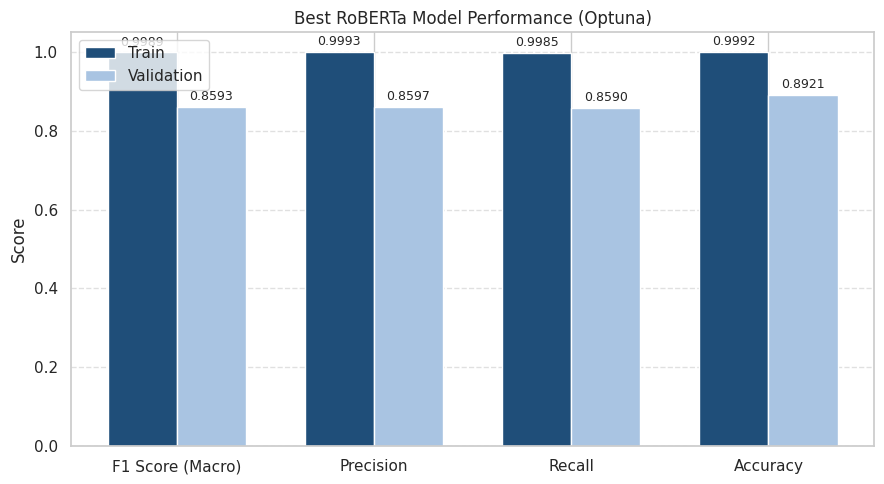

In [23]:
metrics_df = get_metrics_df(title, train_labels, train_pred_labels, val_labels, val_pred_labels)
display(metrics_df)

plot_metrics(train_labels, train_pred_labels, val_labels, val_pred_labels, title=title)

In [24]:
output_path = "./best_roberta_model"
best_model.save_pretrained(output_path)
tokenizer.save_pretrained(output_path)

('./best_roberta_model/tokenizer_config.json',
 './best_roberta_model/special_tokens_map.json',
 './best_roberta_model/vocab.json',
 './best_roberta_model/merges.txt',
 './best_roberta_model/added_tokens.json',
 './best_roberta_model/tokenizer.json')

<div class="alert alert-block alert-success">

# **3.** **Final Predictions**

<div>

In [ ]:
# Load the test dataset
test_data = pd.read_csv("../data/test.csv")
test_texts = test_data["text"].tolist()

# Get embeddings for test set
X_test_roberta = np.array(get_roberta_embeddings(train_texts, "X_test_roberta_embeddings.pkl", batch_size=32, force_reload=False))

In [ ]:
# Predict labels with the trained classifier
X_test_te3s_pred = clf_roberta_lr.predict(X_test_te3s)

# Create submission DataFrame
submission_te3s = pd.DataFrame({
    "id": test_data["id"],
    "label": X_test_roberta_pred
})

# Save submission to CSV
submission_te3s.to_csv("roberta_lr_pred_25.csv", index=False)
print("Submission file saved as roberta_lr_pred_25.csv")

In [ ]:
# Load the predictions from the saved CSV file
pred_25 = pd.read_csv("roberta_lr_pred_25.csv")
pred_25.head()